In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, Flatten, MaxPooling2D, Dropout, Conv2D
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
import os
import cv2
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7488035730901431945, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 11062808304390699844
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 14098786109117192999
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11281553818
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 9164033425467191606
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [3]:
!gsutil -m cp gs://quickdraw_dataset/full/numpy_bitmap/* ./data

Copying gs://quickdraw_dataset/full/numpy_bitmap/The Eiffel Tower.npy...
Copying gs://quickdraw_dataset/full/numpy_bitmap/alarm clock.npy...
Copying gs://quickdraw_dataset/full/numpy_bitmap/ambulance.npy...
Copying gs://quickdraw_dataset/full/numpy_bitmap/The Great Wall of China.npy...
Copying gs://quickdraw_dataset/full/numpy_bitmap/angel.npy...
Copying gs://quickdraw_dataset/full/numpy_bitmap/The Mona Lisa.npy...
Copying gs://quickdraw_dataset/full/numpy_bitmap/animal migration.npy...
Copying gs://quickdraw_dataset/full/numpy_bitmap/aircraft carrier.npy...
Copying gs://quickdraw_dataset/full/numpy_bitmap/airplane.npy...
Copying gs://quickdraw_dataset/full/numpy_bitmap/ant.npy...
Copying gs://quickdraw_dataset/full/numpy_bitmap/anvil.npy...
Copying gs://quickdraw_dataset/full/numpy_bitmap/apple.npy...
Copying gs://quickdraw_dataset/full/numpy_bitmap/arm.npy...
Copying gs://quickdraw_dataset/full/numpy_bitmap/asparagus.npy...
Copying gs://quickdraw_dataset/full/numpy_bitmap/axe.npy...


In [4]:
!ls ./data

'aircraft carrier.ndjson'     garden.npy
'aircraft carrier.npy'	      giraffe.ndjson
 airplane.ndjson	      giraffe.npy
 airplane.npy		      goatee.ndjson
'alarm clock.ndjson'	      goatee.npy
'alarm clock.npy'	     'golf club.ndjson'
 ambulance.ndjson	     'golf club.npy'
 ambulance.npy		      grapes.ndjson
 angel.ndjson		      grapes.npy
 angel.npy		      grass.ndjson
'animal migration.ndjson'     grass.npy
'animal migration.npy'	      guitar.ndjson
 ant.ndjson		      guitar.npy
 ant.npy		      hamburger.ndjson
 anvil.ndjson		      hamburger.npy
 anvil.npy		      hammer.ndjson
 apple.ndjson		      hammer.npy
 apple.npy		      hand.ndjson
 arm.ndjson		      hand.npy
 arm.npy		      harp.ndjson
 asparagus.ndjson	      harp.npy
 asparagus.npy		      hat.ndjson
 axe.ndjson		      hat.npy
 axe.npy		      headphones.ndjson
 backpack.ndjson	      headphones.npy
 backpack.npy		      hedgehog.ndjson
 banana.ndjson		      hedgehog.npy
 banana.npy		      helicopter.ndjson
 bandage.ndjson		     

In [0]:
alarm = np.load('./data/alarm clock.npy')
book = np.load('./data/book.npy')
campfire = np.load('./data/campfire.npy')
cloud = np.load('./data/cloud.npy')

In [0]:
data_x = []
for i in range(0,10000):
    a1=alarm[i].reshape(28,28)
    data_x.append(a1)
for i in range(0,10000):
    a1=book[i].reshape(28,28)
    data_x.append(a1)
for i in range(0,10000):
    a1=campfire[i].reshape(28,28)
    data_x.append(a1)
for i in range(0,10000):
    a1=cloud[i].reshape(28,28)
    data_x.append(a1)

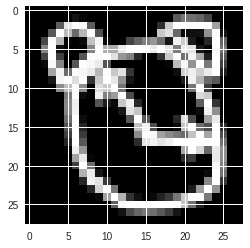

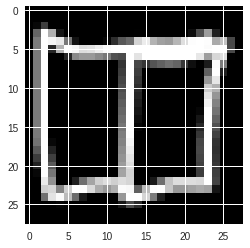

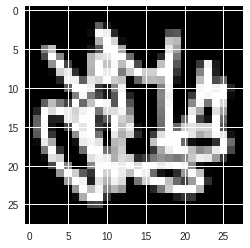

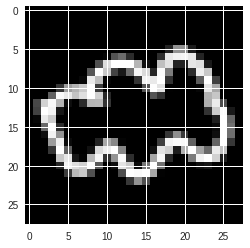

In [7]:
plt.imshow(alarm[0].reshape(28,28), interpolation='nearest',cmap='gray')
plt.show()
plt.imshow(book[0].reshape(28,28), interpolation='nearest',cmap='gray')
plt.show()
plt.imshow(campfire[0].reshape(28,28), interpolation='nearest',cmap='gray')
plt.show()
plt.imshow(cloud[0].reshape(28,28), interpolation='nearest',cmap='gray')
plt.show()

In [0]:
data_x = np.array(data_x)

In [9]:
print data_x.shape

(40000, 28, 28)


In [0]:
data_x = data_x.reshape(-1,28,28,1)
data_x = data_x/255.0

In [0]:
data_y = np.zeros((40000,))

In [0]:
data_y[:10000] = 0
data_y[10000:20000] = 1
data_y[20000:30000] = 2
data_y[30000:] = 3

In [0]:
data_y = np_utils.to_categorical(data_y)

In [14]:
print data_y

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [0]:
batch_size = 64
epochs = 30
num_classes = 4

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1),padding='same'))
model.add(LeakyReLU(alpha=0.05))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.05))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.05))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(num_classes, activation='softmax'))

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
__________

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model.fit(data_x, data_y, batch_size=batch_size,epochs=epochs,validation_split=0.10)

Train on 36000 samples, validate on 4000 samples
Epoch 1/30
36000/36000 [==============================] - 59s 2ms/step - loss: 0.2363 - acc: 0.9173 - val_loss: 0.1329 - val_acc: 0.9627
Epoch 2/30
36000/36000 [==============================] - 35s 981us/step - loss: 0.1091 - acc: 0.9641 - val_loss: 0.1669 - val_acc: 0.9493
Epoch 3/30
36000/36000 [==============================] - 38s 1ms/step - loss: 0.0828 - acc: 0.9721 - val_loss: 0.0868 - val_acc: 0.9732
Epoch 4/30
36000/36000 [==============================] - 37s 1ms/step - loss: 0.0664 - acc: 0.9768 - val_loss: 0.1165 - val_acc: 0.9645
Epoch 5/30
36000/36000 [==============================] - 37s 1ms/step - loss: 0.0516 - acc: 0.9824 - val_loss: 0.0720 - val_acc: 0.9798
Epoch 6/30
36000/36000 [==============================] - 35s 969us/step - loss: 0.0401 - acc: 0.9854 - val_loss: 0.0527 - val_acc: 0.9845
Epoch 7/30
36000/36000 [==============================] - 37s 1ms/step - loss: 0.0319 - acc: 0.9883 - val_loss: 0.1696 - val_

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
model.save('/content/drive/My Drive/Quick_Draw_CNN.h5')